In [1]:
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import tensorflow as tf
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
print("done")

C:\Users\Hp pc\Anaconda3\envs\carnatic\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp pc\Anaconda3\envs\carnatic\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp pc\Anaconda3\envs\carnatic\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp pc\Anaconda3\envs\carnatic\lib\site-packages\tensorf

done


Using TensorFlow backend.


In [19]:
experiment = Experiment(api_key="ZfGMER7qaJMtMLEXgHV0BrAsH",
                        project_name="carnatic_music")


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\Hp pc\\AUDIO_ANALYSIS' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.com/karikam05/carnatic-music/e5b839009b0349b28731a8bdefbf0118



COMET WARNING: Unknown error exporting current conda environment


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

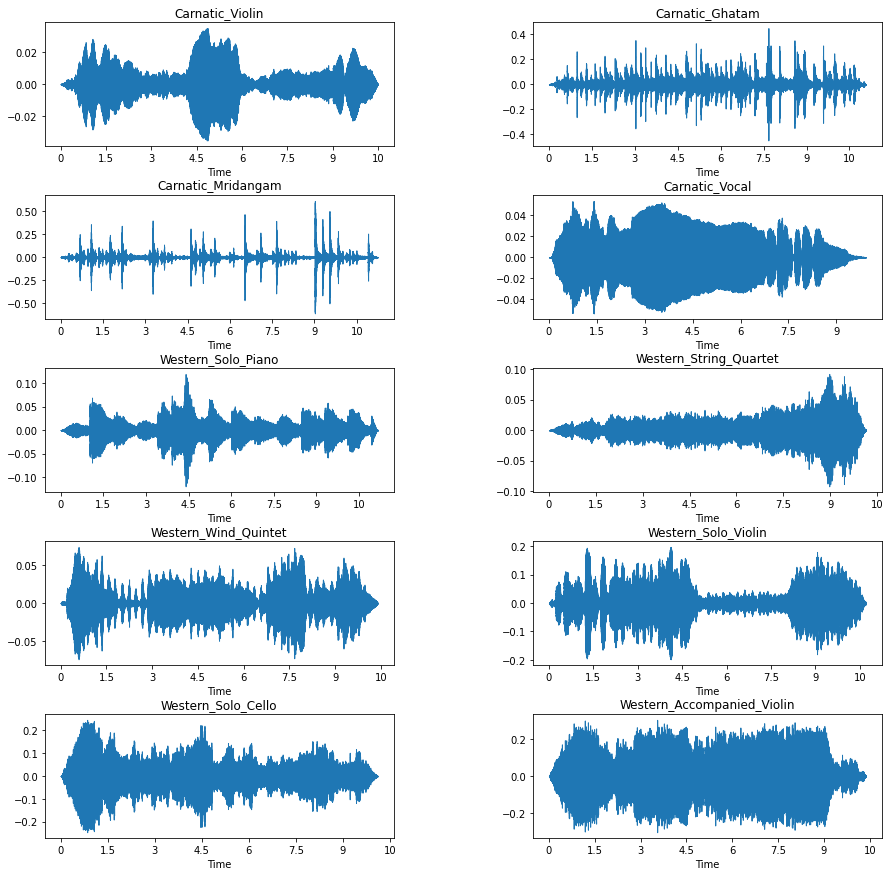

In [20]:
# Load dataset
import csv
import audioread
df = pd.read_csv('MusicDataset/metadata/Musicdata1.csv')# Create a list of the class labels
labels = list(df['class'].unique())
# Let's grab a single audio file from each class
files = dict()
for i in range(len(labels)):
    tmp = df[df['class'] == labels[i]][:1].reset_index()
    path = 'MusicDataset/audio/fold{}/{}'.format(tmp['fold'][0], tmp['slice_file_name'][0])
    files[labels[i]] = path
    fig = plt.figure(figsize=(15,15))# Log graphic of waveforms to Comet
experiment.log_image('class_examples.png')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels):
    fn = files[label]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, sample_rate = librosa.load(fn)
    librosa.display.waveshow(data, sr= sample_rate)
plt.savefig('class_examples.png')

In [21]:
# Log graphic of waveforms to Comet
experiment.log_image('class_examples.png')
# Log audio files to Comet for debugging
for label in labels:
    fn = files[label]
    experiment.log_audio(fn, metadata = {'name': label})
fn = 'MusicDataset/audio/fold1/Aaniraimekkani.multitrack-violin.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))
print(len(labels))

Original sample rate: 48000
Librosa sample rate: 22050
Original audio file min~max range: -76026112 to 60965888
Librosa audio file min~max range: -0.04 to -0.04
10


C:\Users\Hp pc\Anaconda3\envs\carnatic\lib\site-packages\ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


{'web': 'https://www.comet.com/api/image/download?imageId=e4f4a3599f9f4c4299fb63a5f54d4810&experimentKey=e5b839009b0349b28731a8bdefbf0118',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=e4f4a3599f9f4c4299fb63a5f54d4810&experimentKey=e5b839009b0349b28731a8bdefbf0118',
 'imageId': 'e4f4a3599f9f4c4299fb63a5f54d4810'}

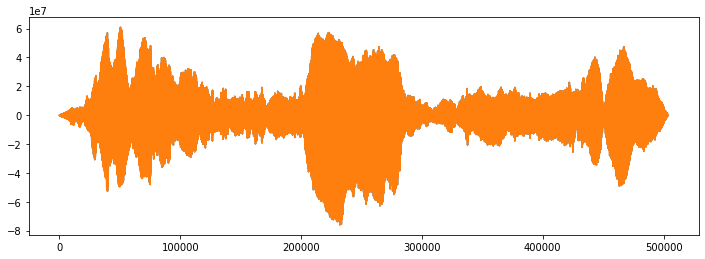

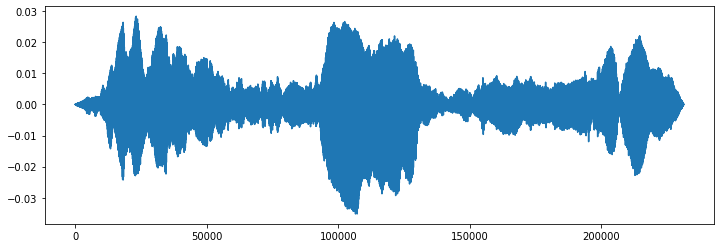

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('original_audio.png')
experiment.log_image('original_audio.png')
# Librosa: mono track
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
plt.savefig('librosa_audio.png')
experiment.log_image('librosa_audio.png')

In [23]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 452)


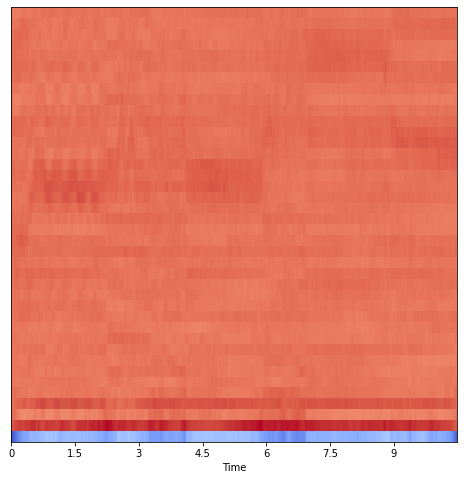

In [24]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')
experiment.log_image('MFCCs.png')

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

In [25]:
features = []
import os
# Iterate through each sound file and extract the features 
metadata= pd.read_csv('MusicDataset/metadata/Musicdata1.csv') 
fulldatasetpath= 'C:\\Users\\Hp pc\\AUDIO_ANALYSIS\\MusicDataset\\audio'
#for index, row in metadata.iterrows():
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    class_label = row["class"]
    data = extract_features(file_name)
    features.append([data, class_label])
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

featuresdf.head()
featuresdf.iloc[0]['feature']

array([-5.41517151e+02,  1.03288857e+02, -2.09685421e+01,  4.51897926e+01,
       -7.31762743e+00, -1.06241798e+01, -1.04500074e+01, -9.71995735e+00,
       -3.11487412e+00, -1.09566174e+01, -1.54824762e+01, -4.04470110e+00,
       -7.72584963e+00, -5.83546305e+00, -1.89279795e+00,  4.21685457e+00,
       -7.58998919e+00,  5.25713253e+00, -7.58154809e-01, -1.27665873e+01,
       -2.89532959e-01, -1.49172628e+00,  1.10488358e+01,  1.37288427e+01,
        1.06224051e+01,  1.29149094e+01,  3.51227188e+00,  8.99843121e+00,
        1.01063786e+01,  9.53975391e+00,  4.43502776e-02, -1.01534195e+01,
       -7.75432301e+00, -3.96182323e+00,  7.05239153e+00,  3.21995211e+00,
       -2.52421021e-01, -1.84600562e-01, -1.97548246e+00, -5.05416965e+00],
      dtype=float32)

In [26]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.44, random_state = 127)

In [27]:
##num_labels = yy.shape[1]
#def build_model_graph(input_shape=(40,)):
 #   model = Sequential()
  #  model.add(Dense(256))
   # model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(256))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(num_labels))
   # model.add(Activation('softmax'))
    # Compile the model
    #model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    #return build_model_graph()

# Display model architecture summary 
#model.summary()
num_labels = yy.shape[1]
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
model = Sequential()
#model.add(keras.Input(shape=(40,)))  
model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [28]:

# Display model architecture summary 
#model.summary()

# Calculate pre-training accuracy 
#score = model.evaluate(x_test, y_test, verbose=1)
#accuracy = 100*score[1]
#print("Pre-training accuracy: %.4f%%" % accuracy)
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    #return model = build_model_graph()
#return model

# Display model architecture summary 
#model.summary()
# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print("Pre-training accuracy: %.4f%%" % accuracy)

Pre-training accuracy: 10.0000%


In [30]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 134
num_batch_size = 32
history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)
# Evaluating the model on the training and testing set
train_score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(train_score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Train on 50 samples, validate on 40 samples
Epoch 1/134
50/50 [==============================] - 0s 400us/step - loss: 1.8997 - accuracy: 0.5200 - val_loss: 1.3128 - val_accuracy: 0.5500
Epoch 2/134
50/50 [==============================] - 0s 340us/step - loss: 1.6847 - accuracy: 0.5000 - val_loss: 1.3063 - val_accuracy: 0.5750
Epoch 3/134
50/50 [==============================] - 0s 360us/step - loss: 1.6742 - accuracy: 0.5600 - val_loss: 1.3001 - val_accuracy: 0.6000
Epoch 4/134
50/50 [==============================] - 0s 560us/step - loss: 1.3771 - accuracy: 0.5800 - val_loss: 1.2894 - val_accuracy: 0.6000
Epoch 5/134
50/50 [==============================] - 0s 500us/step - loss: 1.5903 - accuracy: 0.6000 - val_loss: 1.2802 - val_accuracy: 0.5750
Epoch 6/134
50/50 [==============================] - 0s 360us/step - loss: 0.9291 - accuracy: 0.7400 - val_loss: 1.2708 - val_accuracy: 0.5750
Epoch 7/134
50/50 [==============================] - 0s 340us/step - loss: 0.9680 - accuracy: 0.58

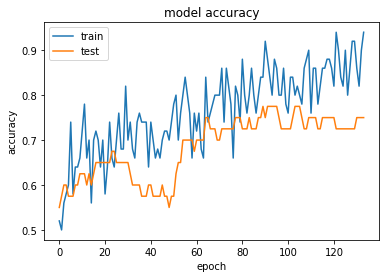

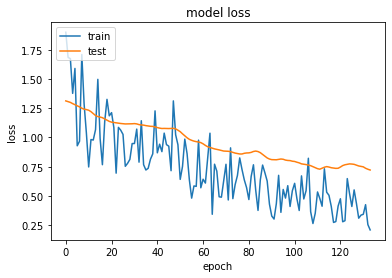

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/karikam05/carnatic-music/e5b839009b0349b28731a8bdefbf0118
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [268]                : (0.03999999910593033, 0.9399999976158142)
COMET INFO:     batch_accuracy [268]          : (0.03125, 1.0)
COMET INFO:     batch_loss [268]              : (0.07682393491268158, 69.59723663330078)
COMET INFO:     epoch_duration [268]          : (0.014999999897554517, 0.2029999999795109)
COMET INFO:     loss [268]                    : (0.2100125801563263, 70.36932250976562)
COMET INFO:     val_accuracy [268]            : (0.0, 0.7749999761581421)
COMET INFO:     val_loss [268]                : (0.7219968199729919, 29.51568489074707)
COMET INFO:     validate_batch_accuracy [268] : (0.0, 0.78125)
COMET INFO